# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [1]:
# Import essential libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("PIL version:", Image.__version__)
print("tensorflow version:", tf.__version__)
print("keras version:", keras.__version__)


numpy version: 2.2.2
pandas version: 2.2.3
seaborn version: 0.13.2
matplotlib version: 3.10.0
PIL version: 11.1.0
tensorflow version: 2.20.0
keras version: 3.11.3


Load the dataset.

In [ ]:
# Load and unzip the dataset
import zipfile

zipPath = "C:/Users/aa_la/Downloads/Dataset/Dataset_Waste_Segregation/data.zip"   

extractPath = "C:/Users/aa_la/Downloads/DataSegregation"
with zipfile.ZipFile(zipPath, 'r') as zip_ref:
    zip_ref.extractall(extractPath)


extractPath = "C:/Users/aa_la/Downloads/DataSegregation/data"
print("Folders:", os.listdir(extractPath))


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [3]:
# Create a function to load the raw images


def loadImg(img_path, target_size=(224, 224)):
    
    img = Image.open(img_path).convert("RGB")

    w, h = img.size
    side = min(w, h)
    left = (w - side) // 2
    top = (h - side) // 2
    img = img.crop((left, top, left + side, top + side))


    img = img.resize(target_size)

    img_array = np.array(img) / 255.0  

    return img_array


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [7]:
# Get the images and their labels

datasetPath = "C:/Users/aa_la/Downloads/DataSegregation/data"   # your dataset folder with 7 subfolders

classes = sorted(os.listdir(datasetPath))  # folder names = labels
print("Classes:", classes)

X = []   # images
y = []   # labels

for idx, cls in enumerate(classes):
    cls_folder = os.path.join(datasetPath, cls)
    for imgName in os.listdir(cls_folder):
        imgPath = os.path.join(cls_folder, imgName)
        try:
            img_array = loadImg(imgPath)
            X.append(img_array)
            y.append(idx)
        except Exception as e:
            print(f"Skipping {imgPath}: {e}")

X = np.array(X)
y = np.array(y)

print("Images loaded:", X.shape)
print("Labels loaded:", y.shape)


Classes: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']
Images loaded: (7625, 224, 224, 3)
Labels loaded: (7625,)


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

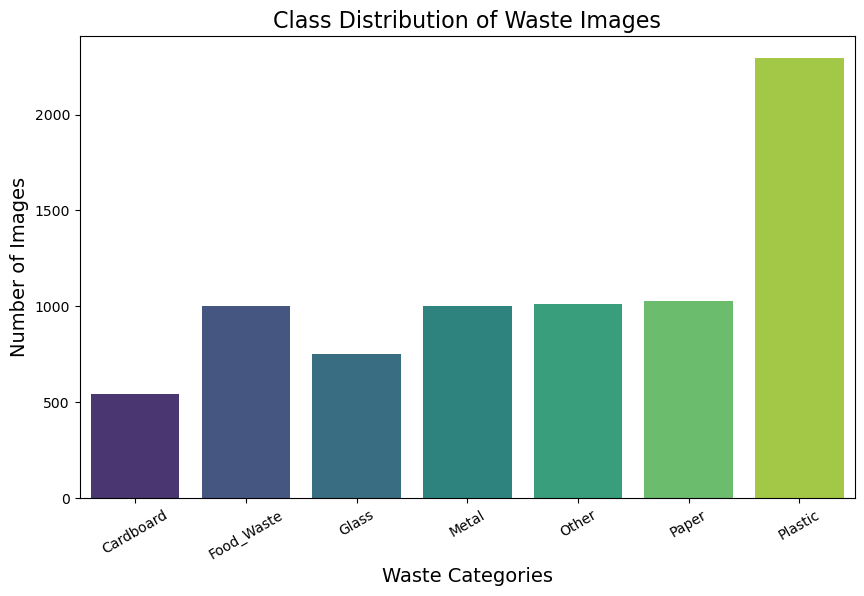

In [12]:
# Visualise Data Distribution
classCounts = pd.Series(y).value_counts().sort_index()
classNames = [classes[i] for i in range(len(classes))]


plt.figure(figsize=(10,6))

sns.barplot(x=classNames, y=classCounts.values, hue=classNames, palette="viridis", legend=False)
plt.title("Class Distribution of Waste Images", fontsize=16)
plt.xlabel("Waste Categories", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(rotation=30)
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

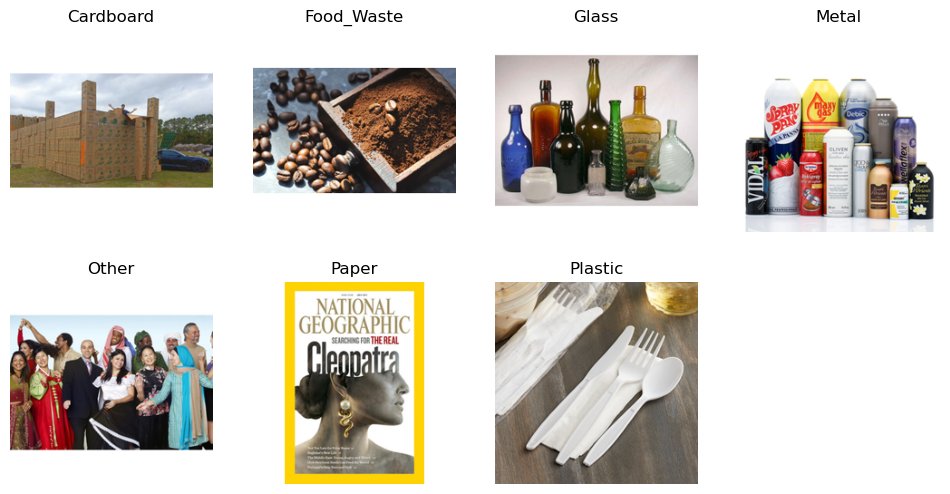

In [15]:
# Visualise Sample Images (across different labels)

plt.figure(figsize=(12,6))
for i, cls in enumerate(classes):
    idx = np.where(y == i)[0][0]  
    plt.subplot(2, 4, i+1)
    plt.imshow(X[idx])
    plt.title(cls)
    plt.axis("off")
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [18]:
# Find the smallest and largest image dimensions from the data set


min_w, min_h = float("inf"), float("inf")
max_w, max_h = 0, 0

for cls in classes:
    clsFolder = os.path.join(datasetPath, cls)
    for imgName in os.listdir(clsFolder):
        imgPath = os.path.join(clsFolder, imgName)
        try:
            with Image.open(imgPath) as img:
                w, h = img.size
                min_w = min(min_w, w)
                min_h = min(min_h, h)
                max_w = max(max_w, w)
                max_h = max(max_h, h)
        except:
            pass

print(f"Smallest dimensions: {min_w} x {min_h}")
print(f"Largest dimensions:  {max_w} x {max_h}")


Smallest dimensions: 256 x 256
Largest dimensions:  256 x 256


In [19]:
# Resize the image dimensions
RESIZE_TO = (224, 224)   

X_resized = []
y_resized = []

for idx, cls in enumerate(classes):
    clsFdr = os.path.join(datasetPath, cls)
    for imgNm in os.listdir(clsFdr):
        imgPt = os.path.join(clsFdr, imgNm)
        try:
            with Image.open(imgPt) as img:
                img = img.convert("RGB")
                img = img.resize(RESIZE_TO)  
                img_array = np.array(img) / 255.0
                X_resized.append(img_array)
                y_resized.append(idx)
        except:
            pass

X_resized = np.array(X_resized)
y_resized = np.array(y_resized)

print("Resized dataset shape:", X_resized.shape, y_resized.shape)



Resized dataset shape: (7625, 224, 224, 3) (7625,)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [24]:
# Encode the labels suitably
from tensorflow.keras.utils import to_categorical

num_classes = len(classes)


y_encoded = to_categorical(y_resized, num_classes=num_classes)

print("Original labels shape:", y_resized.shape)
print("One-hot encoded labels shape:", y_encoded.shape)
print("Sample data:")
print(y_encoded[:5])


Original labels shape: (7625,)
One-hot encoded labels shape: (7625, 7)
Sample data:
[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [34]:
# Assign specified parts of the dataset to train, validation, and test sets

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train size:", X_train.shape, y_train.shape)
print("Validation size:", X_val.shape, y_val.shape)
print("Test size:", X_test.shape, y_test.shape)


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(X_train, y_train, batch_size=32, shuffle=True)
val_generator   = val_test_datagen.flow(X_val, y_val, batch_size=32, shuffle=False)
test_generator  = val_test_datagen.flow(X_test, y_test, batch_size=32, shuffle=False)


Train size: (5337, 224, 224, 3) (5337,)
Validation size: (1144, 224, 224, 3) (1144,)
Test size: (1144, 224, 224, 3) (1144,)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [52]:
# Build and compile the model
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras import layers, optimizers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))


base_model.trainable = False


inputs = layers.Input(shape=(224,224,3))
x = base_model(inputs, training=False)          # feature extractor
x = layers.GlobalAveragePooling2D()(x)          # reduce feature maps
x = layers.Dropout(0.3)(x)                      # prevent overfitting
outputs = layers.Dense(len(classes), activation='softmax')(x)  # classification head

model = Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()



Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         8,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,266,951 (8.65 MB)

 Trainable params: 8,967 (35.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [54]:
# Training

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 75s 430ms/step - accuracy: 0.2841 - loss: 1.9303 - val_accuracy: 0.4283 - val_loss: 1.5147 - learning_rate: 1.0000e-04
Epoch 2/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 71s 424ms/step - accuracy: 0.4639 - loss: 1.4476 - val_accuracy: 0.5795 - val_loss: 1.2075 - learning_rate: 1.0000e-04
Epoch 3/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 72s 433ms/step - accuracy: 0.5623 - loss: 1.2113 - val_accuracy: 0.6512 - val_loss: 1.0409 - learning_rate: 1.0000e-04
Epoch 4/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 71s 423ms/step - accuracy: 0.6254 - loss: 1.0605 - val_accuracy: 0.6801 - val_loss: 0.9376 - learning_rate: 1.0000e-04
Epoch 5/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 72s 428ms/step - accuracy: 0.6631 - loss: 0.9615 - val_accuracy: 0.7054 - val_loss: 0.8683 - learning_rate: 1.0000e-04
Epoch 6/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 70s 422ms/step - accuracy: 0.6852 - loss: 0.8953 - val_accuracy: 0.7238 - val_loss: 0.8164 - learning_rate: 1.0000e-04
Epoch 7/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 70s 42

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 348ms/step - accuracy: 0.8330 - loss: 0.5114
Test Accuracy: 0.8330
Test Loss: 0.5114
36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 362ms/step
Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.92      0.81      0.86        81
  Food_Waste       0.88      0.85      0.87       150
       Glass       0.89      0.85      0.87       113
       Metal       0.90      0.87      0.88       150
       Other       0.78      0.79      0.79       151
       Paper       0.72      0.76      0.74       155
     Plastic       0.82      0.86      0.84       344

    accuracy                           0.83      1144
   macro avg       0.85      0.83      0.84      1144
weighted avg       0.84      0.83      0.83      1144



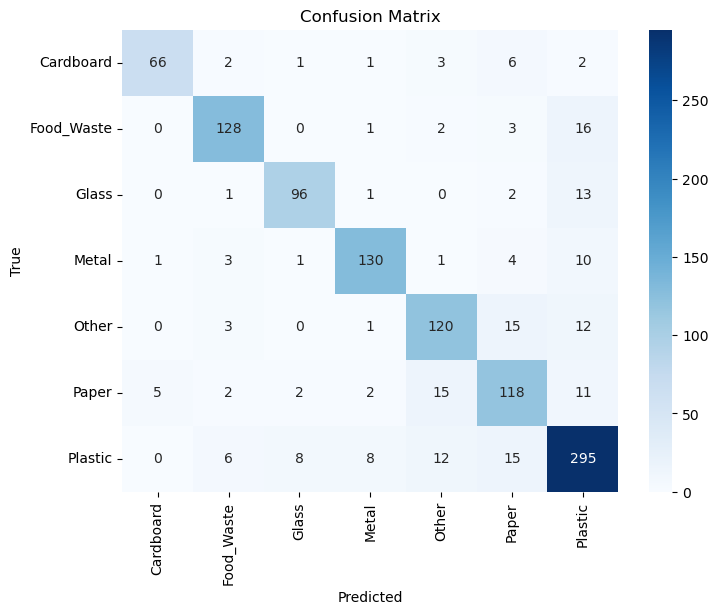

In [58]:
# Evaluate on the test set; display suitable metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical


test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)  # <-- y_test not one-hot
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test   

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images

# Data Augmentation Pipeline
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values
    rotation_range=20,       # Random rotations
    width_shift_range=0.2,   # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=0.2,         # Shear transformations
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Randomly flip images
    fill_mode='nearest'      # Fill in new pixels
)

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images
def augImage(datagen, X, y, augment_count=1):
    
    X_aug = []
    y_aug = []
    
    for i in range(len(X)):
        img = X[i].reshape((1,) + X[i].shape)  # reshape for datagen
        for _ in range(augment_count):
            for batch in datagen.flow(img, batch_size=1):
                X_aug.append(batch[0])
                y_aug.append(y[i])
                break  # break after one image is generated
    
    return np.array(X_aug), np.array(y_aug)


In [ ]:
# Create the augmented training dataset

from sklearn.utils import shuffle


X_train_aug, y_train_aug = augImage(train_datagen, X_train, y_train, augment_count=2)
X_train_final = np.concatenate([X_train, X_train_aug])
y_train_final = np.concatenate([y_train, y_train_aug])

X_train_final, y_train_final = shuffle(X_train_final, y_train_final, random_state=42)



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images
y_train_aug = to_categorical(y_train_aug, num_classes=7)
y_val = to_categorical(y_val, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

history = model.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_val, y_val),
    epochs=20,               
    batch_size=32,          
    verbose=1
)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results